In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, fig, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot validation accuracy and generalisation gap
    ax_1 = fig.add_subplot(111)
    gen_gap = stats[1:, keys['error(valid)']] - stats[1:, keys['error(train)']]
    ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, gen_gap)
    ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, stats[1:, keys['acc(valid)']])
    
    return stats, keys, run_time, fig

In [2]:
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x106dbe3b0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x106dbef20>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 7.5s to complete
    error(train)=2.32e+00, acc(train)=4.50e-01, error(valid)=2.32e+00, acc(valid)=4.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 8.1s to complete
    error(train)=1.73e+00, acc(train)=5.53e-01, error(valid)=1.73e+00, acc(valid)=5.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 6.9s to complete
    error(train)=1.50e+00, acc(train)=5.91e-01, error(valid)=1.50e+00, acc(valid)=5.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 6.1s to complete
    error(train)=1.36e+00, acc(train)=6.25e-01, error(valid)=1.36e+00, acc(valid)=6.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 6.1s to complete
    error(train)=1.25e+00, acc(train)=6.47e-01, error(valid)=1.26e+00, acc(valid)=6.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 6.2s to complete
    error(train)=1.18e+00, acc(train)=6.63e-01, error(valid)=1.18e+00, acc(valid)=6.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 10.7s to complete
    error(train)=1.11e+00, acc(train)=6.77e-01, error(valid)=1.12e+00, acc(valid)=6.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.3s to complete
    error(train)=1.05e+00, acc(train)=6.92e-01, error(valid)=1.06e+00, acc(valid)=6.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 5.4s to complete
    error(train)=1.00e+00, acc(train)=7.05e-01, error(valid)=1.01e+00, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 7.1s to complete
    error(train)=9.65e-01, acc(train)=7.13e-01, error(valid)=9.74e-01, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 7.0s to complete
    error(train)=9.31e-01, acc(train)=7.22e-01, error(valid)=9.40e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 7.6s to complete
    error(train)=8.95e-01, acc(train)=7.31e-01, error(valid)=9.05e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 7.5s to complete
    error(train)=8.70e-01, acc(train)=7.36e-01, error(valid)=8.82e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 9.7s to complete
    error(train)=8.43e-01, acc(train)=7.42e-01, error(valid)=8.56e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 9.8s to complete
    error(train)=8.25e-01, acc(train)=7.47e-01, error(valid)=8.38e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 7.5s to complete
    error(train)=8.06e-01, acc(train)=7.52e-01, error(valid)=8.21e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 7.5s to complete
    error(train)=7.84e-01, acc(train)=7.57e-01, error(valid)=7.98e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 7.1s to complete
    error(train)=7.64e-01, acc(train)=7.64e-01, error(valid)=7.79e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 8.6s to complete
    error(train)=7.51e-01, acc(train)=7.66e-01, error(valid)=7.68e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 5.9s to complete
    error(train)=7.37e-01, acc(train)=7.70e-01, error(valid)=7.56e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.0s to complete
    error(train)=7.26e-01, acc(train)=7.72e-01, error(valid)=7.44e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.7s to complete
    error(train)=7.12e-01, acc(train)=7.77e-01, error(valid)=7.32e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 6.3s to complete
    error(train)=7.02e-01, acc(train)=7.79e-01, error(valid)=7.22e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.1s to complete
    error(train)=6.91e-01, acc(train)=7.83e-01, error(valid)=7.12e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 6.1s to complete
    error(train)=6.80e-01, acc(train)=7.85e-01, error(valid)=7.01e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 5.7s to complete
    error(train)=6.70e-01, acc(train)=7.89e-01, error(valid)=6.91e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.5s to complete
    error(train)=6.63e-01, acc(train)=7.89e-01, error(valid)=6.86e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 5.6s to complete
    error(train)=6.56e-01, acc(train)=7.91e-01, error(valid)=6.81e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 5.8s to complete
    error(train)=6.50e-01, acc(train)=7.92e-01, error(valid)=6.74e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 6.1s to complete
    error(train)=6.37e-01, acc(train)=7.96e-01, error(valid)=6.63e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 5.8s to complete
    error(train)=6.32e-01, acc(train)=7.97e-01, error(valid)=6.58e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.0s to complete
    error(train)=6.27e-01, acc(train)=7.99e-01, error(valid)=6.54e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.9s to complete
    error(train)=6.20e-01, acc(train)=8.00e-01, error(valid)=6.48e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 7.4s to complete
    error(train)=6.13e-01, acc(train)=8.02e-01, error(valid)=6.43e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 8.3s to complete
    error(train)=6.11e-01, acc(train)=8.03e-01, error(valid)=6.39e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.6s to complete
    error(train)=6.04e-01, acc(train)=8.04e-01, error(valid)=6.33e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 10.5s to complete
    error(train)=5.98e-01, acc(train)=8.06e-01, error(valid)=6.28e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 5.3s to complete
    error(train)=5.93e-01, acc(train)=8.07e-01, error(valid)=6.24e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 5.3s to complete
    error(train)=5.86e-01, acc(train)=8.09e-01, error(valid)=6.17e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.1s to complete
    error(train)=5.81e-01, acc(train)=8.10e-01, error(valid)=6.12e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 5.4s to complete
    error(train)=5.78e-01, acc(train)=8.11e-01, error(valid)=6.10e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.8s to complete
    error(train)=5.74e-01, acc(train)=8.12e-01, error(valid)=6.08e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.5s to complete
    error(train)=5.70e-01, acc(train)=8.13e-01, error(valid)=6.04e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 9.3s to complete
    error(train)=5.65e-01, acc(train)=8.14e-01, error(valid)=5.99e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 5.3s to complete
    error(train)=5.60e-01, acc(train)=8.16e-01, error(valid)=5.95e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 8.0s to complete
    error(train)=5.57e-01, acc(train)=8.16e-01, error(valid)=5.93e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.9s to complete
    error(train)=5.55e-01, acc(train)=8.17e-01, error(valid)=5.91e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.7s to complete
    error(train)=5.52e-01, acc(train)=8.18e-01, error(valid)=5.89e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 7.0s to complete
    error(train)=5.47e-01, acc(train)=8.20e-01, error(valid)=5.85e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 5.3s to complete
    error(train)=5.47e-01, acc(train)=8.19e-01, error(valid)=5.86e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.6s to complete
    error(train)=5.42e-01, acc(train)=8.21e-01, error(valid)=5.81e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.2s to complete
    error(train)=5.38e-01, acc(train)=8.21e-01, error(valid)=5.77e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 6.5s to complete
    error(train)=5.33e-01, acc(train)=8.22e-01, error(valid)=5.73e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.6s to complete
    error(train)=5.34e-01, acc(train)=8.22e-01, error(valid)=5.74e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 5.9s to complete
    error(train)=5.32e-01, acc(train)=8.23e-01, error(valid)=5.72e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.0s to complete
    error(train)=5.26e-01, acc(train)=8.25e-01, error(valid)=5.67e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.7s to complete
    error(train)=5.25e-01, acc(train)=8.24e-01, error(valid)=5.66e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.1s to complete
    error(train)=5.22e-01, acc(train)=8.25e-01, error(valid)=5.65e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.9s to complete
    error(train)=5.17e-01, acc(train)=8.27e-01, error(valid)=5.59e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.2s to complete
    error(train)=5.18e-01, acc(train)=8.26e-01, error(valid)=5.61e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 5.4s to complete
    error(train)=5.16e-01, acc(train)=8.27e-01, error(valid)=5.60e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.9s to complete
    error(train)=5.11e-01, acc(train)=8.29e-01, error(valid)=5.55e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.2s to complete
    error(train)=5.08e-01, acc(train)=8.29e-01, error(valid)=5.51e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.4s to complete
    error(train)=5.04e-01, acc(train)=8.30e-01, error(valid)=5.48e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.5s to complete
    error(train)=5.03e-01, acc(train)=8.30e-01, error(valid)=5.48e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.7s to complete
    error(train)=5.02e-01, acc(train)=8.31e-01, error(valid)=5.48e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 5.6s to complete
    error(train)=5.00e-01, acc(train)=8.31e-01, error(valid)=5.46e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 5.7s to complete
    error(train)=4.97e-01, acc(train)=8.32e-01, error(valid)=5.43e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 5.8s to complete
    error(train)=4.95e-01, acc(train)=8.32e-01, error(valid)=5.42e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.1s to complete
    error(train)=4.92e-01, acc(train)=8.33e-01, error(valid)=5.39e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.1s to complete
    error(train)=4.93e-01, acc(train)=8.32e-01, error(valid)=5.41e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.7s to complete
    error(train)=4.90e-01, acc(train)=8.34e-01, error(valid)=5.38e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.9s to complete
    error(train)=4.90e-01, acc(train)=8.33e-01, error(valid)=5.38e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.4s to complete
    error(train)=4.86e-01, acc(train)=8.34e-01, error(valid)=5.34e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 6.1s to complete
    error(train)=4.82e-01, acc(train)=8.37e-01, error(valid)=5.31e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 5.1s to complete
    error(train)=4.83e-01, acc(train)=8.36e-01, error(valid)=5.32e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 5.9s to complete
    error(train)=4.80e-01, acc(train)=8.36e-01, error(valid)=5.30e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 5.3s to complete
    error(train)=4.77e-01, acc(train)=8.37e-01, error(valid)=5.29e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.0s to complete
    error(train)=4.75e-01, acc(train)=8.38e-01, error(valid)=5.27e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 8.6s to complete
    error(train)=4.79e-01, acc(train)=8.37e-01, error(valid)=5.31e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 6.2s to complete
    error(train)=4.73e-01, acc(train)=8.39e-01, error(valid)=5.24e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 7.0s to complete
    error(train)=4.72e-01, acc(train)=8.40e-01, error(valid)=5.24e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 5.7s to complete
    error(train)=4.70e-01, acc(train)=8.40e-01, error(valid)=5.24e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.8s to complete
    error(train)=4.69e-01, acc(train)=8.40e-01, error(valid)=5.23e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 5.8s to complete
    error(train)=4.67e-01, acc(train)=8.41e-01, error(valid)=5.23e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.7s to complete
    error(train)=4.66e-01, acc(train)=8.40e-01, error(valid)=5.22e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 7.3s to complete
    error(train)=4.64e-01, acc(train)=8.42e-01, error(valid)=5.20e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 8.2s to complete
    error(train)=4.64e-01, acc(train)=8.41e-01, error(valid)=5.20e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 5.8s to complete
    error(train)=4.59e-01, acc(train)=8.43e-01, error(valid)=5.16e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 5.5s to complete
    error(train)=4.60e-01, acc(train)=8.43e-01, error(valid)=5.17e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 5.5s to complete
    error(train)=4.58e-01, acc(train)=8.43e-01, error(valid)=5.15e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 5.2s to complete
    error(train)=4.57e-01, acc(train)=8.43e-01, error(valid)=5.15e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 9.9s to complete
    error(train)=4.55e-01, acc(train)=8.43e-01, error(valid)=5.13e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 6.2s to complete
    error(train)=4.56e-01, acc(train)=8.43e-01, error(valid)=5.13e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 5.3s to complete
    error(train)=4.53e-01, acc(train)=8.44e-01, error(valid)=5.11e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 9.9s to complete
    error(train)=4.53e-01, acc(train)=8.44e-01, error(valid)=5.12e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 5.6s to complete
    error(train)=4.51e-01, acc(train)=8.45e-01, error(valid)=5.10e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 6.1s to complete
    error(train)=4.50e-01, acc(train)=8.45e-01, error(valid)=5.10e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 21.1s to complete
    error(train)=4.49e-01, acc(train)=8.45e-01, error(valid)=5.08e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 9.0s to complete
    error(train)=4.47e-01, acc(train)=8.46e-01, error(valid)=5.08e-01, acc(valid)=8.28e-01


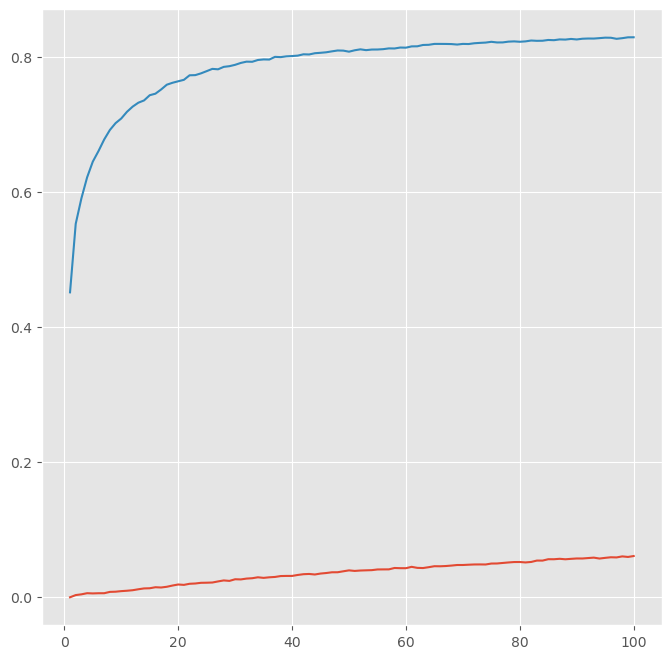

In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# Setup hyperparameters
learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim = 784, 47
hidden_dim = 128

#reset the data and weight
rng.seed(seed)
train_data.reset()
valid_data.reset()
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

# model configuration for this experiment
incl_prob_ex1 = 0.7
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # first hidden layer
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=incl_prob_ex1),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=incl_prob_ex1),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # third hidden layer
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=incl_prob_ex1),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

# initialise the plot object
fig = plt.figure(figsize=(8, 8))

# training 
error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRule(learning_rate=learning_rate)
stats_ex1, keys_ex1, _, fig = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, fig, notebook=True)



  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 8.3s to complete
    error(train)=1.67e+00, acc(train)=5.60e-01, error(valid)=1.68e+00, acc(valid)=5.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 11.5s to complete
    error(train)=1.53e+00, acc(train)=5.94e-01, error(valid)=1.53e+00, acc(valid)=5.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 7.8s to complete
    error(train)=1.46e+00, acc(train)=6.08e-01, error(valid)=1.47e+00, acc(valid)=6.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 8.4s to complete
    error(train)=1.41e+00, acc(train)=6.20e-01, error(valid)=1.42e+00, acc(valid)=6.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 7.0s to complete
    error(train)=1.37e+00, acc(train)=6.29e-01, error(valid)=1.38e+00, acc(valid)=6.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 6.5s to complete
    error(train)=1.34e+00, acc(train)=6.33e-01, error(valid)=1.35e+00, acc(valid)=6.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 7.7s to complete
    error(train)=1.31e+00, acc(train)=6.42e-01, error(valid)=1.32e+00, acc(valid)=6.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 7.3s to complete
    error(train)=1.28e+00, acc(train)=6.47e-01, error(valid)=1.29e+00, acc(valid)=6.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.7s to complete
    error(train)=1.26e+00, acc(train)=6.53e-01, error(valid)=1.27e+00, acc(valid)=6.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 8.2s to complete
    error(train)=1.24e+00, acc(train)=6.58e-01, error(valid)=1.25e+00, acc(valid)=6.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 20.2s to complete
    error(train)=1.22e+00, acc(train)=6.63e-01, error(valid)=1.22e+00, acc(valid)=6.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 9.2s to complete
    error(train)=1.20e+00, acc(train)=6.65e-01, error(valid)=1.21e+00, acc(valid)=6.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 9.3s to complete
    error(train)=1.19e+00, acc(train)=6.70e-01, error(valid)=1.19e+00, acc(valid)=6.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 9.0s to complete
    error(train)=1.17e+00, acc(train)=6.74e-01, error(valid)=1.18e+00, acc(valid)=6.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 9.9s to complete
    error(train)=1.16e+00, acc(train)=6.77e-01, error(valid)=1.16e+00, acc(valid)=6.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 9.8s to complete
    error(train)=1.15e+00, acc(train)=6.77e-01, error(valid)=1.15e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 9.5s to complete
    error(train)=1.13e+00, acc(train)=6.83e-01, error(valid)=1.14e+00, acc(valid)=6.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 9.0s to complete
    error(train)=1.12e+00, acc(train)=6.85e-01, error(valid)=1.13e+00, acc(valid)=6.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 9.2s to complete
    error(train)=1.11e+00, acc(train)=6.84e-01, error(valid)=1.12e+00, acc(valid)=6.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 9.6s to complete
    error(train)=1.10e+00, acc(train)=6.90e-01, error(valid)=1.11e+00, acc(valid)=6.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 9.6s to complete
    error(train)=1.09e+00, acc(train)=6.92e-01, error(valid)=1.10e+00, acc(valid)=6.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 9.0s to complete
    error(train)=1.08e+00, acc(train)=6.93e-01, error(valid)=1.09e+00, acc(valid)=6.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 9.0s to complete
    error(train)=1.07e+00, acc(train)=6.95e-01, error(valid)=1.08e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 18.8s to complete
    error(train)=1.07e+00, acc(train)=6.96e-01, error(valid)=1.07e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 9.4s to complete
    error(train)=1.05e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 9.1s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.05e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 9.1s to complete
    error(train)=1.04e+00, acc(train)=7.04e-01, error(valid)=1.04e+00, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 9.5s to complete
    error(train)=1.03e+00, acc(train)=7.06e-01, error(valid)=1.04e+00, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 8.9s to complete
    error(train)=1.02e+00, acc(train)=7.08e-01, error(valid)=1.03e+00, acc(valid)=7.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 9.3s to complete
    error(train)=1.02e+00, acc(train)=7.09e-01, error(valid)=1.02e+00, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 8.8s to complete
    error(train)=1.01e+00, acc(train)=7.11e-01, error(valid)=1.01e+00, acc(valid)=7.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.9s to complete
    error(train)=1.00e+00, acc(train)=7.13e-01, error(valid)=1.00e+00, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.9s to complete
    error(train)=9.94e-01, acc(train)=7.15e-01, error(valid)=9.97e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 9.5s to complete
    error(train)=9.92e-01, acc(train)=7.14e-01, error(valid)=9.96e-01, acc(valid)=7.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 14.7s to complete
    error(train)=9.82e-01, acc(train)=7.17e-01, error(valid)=9.86e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 21.4s to complete
    error(train)=9.80e-01, acc(train)=7.18e-01, error(valid)=9.85e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 13.8s to complete
    error(train)=9.71e-01, acc(train)=7.20e-01, error(valid)=9.75e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 6.9s to complete
    error(train)=9.66e-01, acc(train)=7.21e-01, error(valid)=9.70e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.8s to complete
    error(train)=9.63e-01, acc(train)=7.22e-01, error(valid)=9.68e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.8s to complete
    error(train)=9.57e-01, acc(train)=7.23e-01, error(valid)=9.60e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.6s to complete
    error(train)=9.53e-01, acc(train)=7.24e-01, error(valid)=9.58e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 6.9s to complete
    error(train)=9.48e-01, acc(train)=7.27e-01, error(valid)=9.52e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 6.9s to complete
    error(train)=9.48e-01, acc(train)=7.26e-01, error(valid)=9.53e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 6.5s to complete
    error(train)=9.40e-01, acc(train)=7.28e-01, error(valid)=9.44e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 6.6s to complete
    error(train)=9.37e-01, acc(train)=7.29e-01, error(valid)=9.42e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 9.7s to complete
    error(train)=9.36e-01, acc(train)=7.27e-01, error(valid)=9.41e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 9.9s to complete
    error(train)=9.30e-01, acc(train)=7.30e-01, error(valid)=9.35e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 9.3s to complete
    error(train)=9.26e-01, acc(train)=7.31e-01, error(valid)=9.32e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 9.9s to complete
    error(train)=9.29e-01, acc(train)=7.31e-01, error(valid)=9.34e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 8.7s to complete
    error(train)=9.23e-01, acc(train)=7.33e-01, error(valid)=9.27e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 9.7s to complete
    error(train)=9.18e-01, acc(train)=7.34e-01, error(valid)=9.22e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 8.0s to complete
    error(train)=9.15e-01, acc(train)=7.34e-01, error(valid)=9.21e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 7.9s to complete
    error(train)=9.15e-01, acc(train)=7.33e-01, error(valid)=9.21e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 7.9s to complete
    error(train)=9.10e-01, acc(train)=7.35e-01, error(valid)=9.15e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 9.0s to complete
    error(train)=9.08e-01, acc(train)=7.35e-01, error(valid)=9.14e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 11.4s to complete
    error(train)=9.06e-01, acc(train)=7.36e-01, error(valid)=9.10e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 7.6s to complete
    error(train)=9.01e-01, acc(train)=7.37e-01, error(valid)=9.07e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.2s to complete
    error(train)=9.00e-01, acc(train)=7.37e-01, error(valid)=9.06e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 8.3s to complete
    error(train)=8.97e-01, acc(train)=7.38e-01, error(valid)=9.03e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 7.2s to complete
    error(train)=8.96e-01, acc(train)=7.38e-01, error(valid)=9.03e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.3s to complete
    error(train)=8.93e-01, acc(train)=7.39e-01, error(valid)=8.98e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 9.2s to complete
    error(train)=8.93e-01, acc(train)=7.39e-01, error(valid)=9.00e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 7.1s to complete
    error(train)=8.91e-01, acc(train)=7.40e-01, error(valid)=8.98e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.9s to complete
    error(train)=8.87e-01, acc(train)=7.41e-01, error(valid)=8.93e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.3s to complete
    error(train)=8.86e-01, acc(train)=7.42e-01, error(valid)=8.93e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 6.9s to complete
    error(train)=8.85e-01, acc(train)=7.41e-01, error(valid)=8.92e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 7.7s to complete
    error(train)=8.83e-01, acc(train)=7.41e-01, error(valid)=8.90e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 7.1s to complete
    error(train)=8.80e-01, acc(train)=7.43e-01, error(valid)=8.86e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.2s to complete
    error(train)=8.79e-01, acc(train)=7.42e-01, error(valid)=8.85e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 7.4s to complete
    error(train)=8.81e-01, acc(train)=7.42e-01, error(valid)=8.87e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.5s to complete
    error(train)=8.75e-01, acc(train)=7.44e-01, error(valid)=8.82e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 7.7s to complete
    error(train)=8.73e-01, acc(train)=7.45e-01, error(valid)=8.80e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 7.3s to complete
    error(train)=8.73e-01, acc(train)=7.44e-01, error(valid)=8.79e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 7.2s to complete
    error(train)=8.70e-01, acc(train)=7.44e-01, error(valid)=8.77e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.4s to complete
    error(train)=8.68e-01, acc(train)=7.45e-01, error(valid)=8.75e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 7.3s to complete
    error(train)=8.67e-01, acc(train)=7.46e-01, error(valid)=8.74e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 7.7s to complete
    error(train)=8.65e-01, acc(train)=7.45e-01, error(valid)=8.73e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.7s to complete
    error(train)=8.65e-01, acc(train)=7.47e-01, error(valid)=8.73e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 8.6s to complete
    error(train)=8.64e-01, acc(train)=7.48e-01, error(valid)=8.72e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 7.6s to complete
    error(train)=8.61e-01, acc(train)=7.47e-01, error(valid)=8.69e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 9.6s to complete
    error(train)=8.60e-01, acc(train)=7.48e-01, error(valid)=8.69e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.5s to complete
    error(train)=8.59e-01, acc(train)=7.48e-01, error(valid)=8.66e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 8.9s to complete
    error(train)=8.58e-01, acc(train)=7.47e-01, error(valid)=8.65e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 9.4s to complete
    error(train)=8.56e-01, acc(train)=7.48e-01, error(valid)=8.63e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.0s to complete
    error(train)=8.54e-01, acc(train)=7.50e-01, error(valid)=8.61e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.3s to complete
    error(train)=8.54e-01, acc(train)=7.49e-01, error(valid)=8.61e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 8.8s to complete
    error(train)=8.53e-01, acc(train)=7.50e-01, error(valid)=8.61e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 8.0s to complete
    error(train)=8.49e-01, acc(train)=7.50e-01, error(valid)=8.56e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 7.8s to complete
    error(train)=8.51e-01, acc(train)=7.49e-01, error(valid)=8.59e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.9s to complete
    error(train)=8.46e-01, acc(train)=7.51e-01, error(valid)=8.54e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 7.7s to complete
    error(train)=8.50e-01, acc(train)=7.50e-01, error(valid)=8.59e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.5s to complete
    error(train)=8.46e-01, acc(train)=7.51e-01, error(valid)=8.54e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.6s to complete
    error(train)=8.46e-01, acc(train)=7.51e-01, error(valid)=8.53e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.2s to complete
    error(train)=8.43e-01, acc(train)=7.52e-01, error(valid)=8.51e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 7.6s to complete
    error(train)=8.44e-01, acc(train)=7.52e-01, error(valid)=8.51e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 7.7s to complete
    error(train)=8.40e-01, acc(train)=7.52e-01, error(valid)=8.48e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 7.5s to complete
    error(train)=8.40e-01, acc(train)=7.53e-01, error(valid)=8.48e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 7.8s to complete
    error(train)=8.38e-01, acc(train)=7.54e-01, error(valid)=8.47e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 7.7s to complete
    error(train)=8.37e-01, acc(train)=7.54e-01, error(valid)=8.45e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 9.1s to complete
    error(train)=8.41e-01, acc(train)=7.52e-01, error(valid)=8.49e-01, acc(valid)=7.51e-01


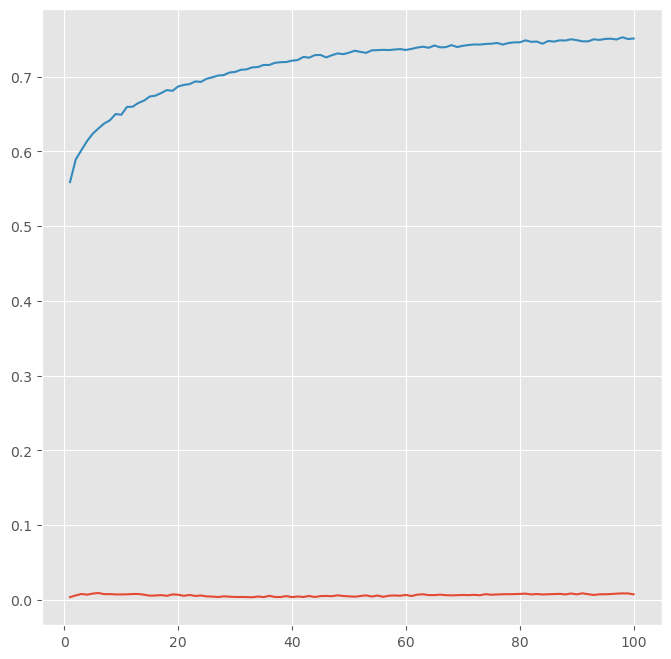

In [8]:
from mlp.penalties import L1Penalty
# experiment 2: L1 penalty 1e-3
# Setup hyperparameters
learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim = 784, 47
hidden_dim = 128

#reset the data and weight
rng.seed(seed)
train_data.reset()
valid_data.reset()
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)


# model configuration for this experiment
lambda_penalty = float(1e-3)
weights_penalty = L1Penalty(lambda_penalty)
biases_penalty = L1Penalty(lambda_penalty)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty, biases_penalty), # first hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty, biases_penalty), # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty, biases_penalty), # third hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty, biases_penalty) # output layer
])

# initialise the plot object
fig_ex2 = plt.figure(figsize=(8, 8))

# training 
error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRule(learning_rate=learning_rate)
stats_ex2, keys_ex2, _, fig_ex2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, fig_ex2, notebook=True)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 9.2s to complete
    error(train)=1.34e+00, acc(train)=6.27e-01, error(valid)=1.34e+00, acc(valid)=6.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 6.7s to complete
    error(train)=1.11e+00, acc(train)=6.86e-01, error(valid)=1.12e+00, acc(valid)=6.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 8.3s to complete
    error(train)=9.88e-01, acc(train)=7.15e-01, error(valid)=9.99e-01, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 8.8s to complete
    error(train)=8.97e-01, acc(train)=7.39e-01, error(valid)=9.10e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 6.1s to complete
    error(train)=8.30e-01, acc(train)=7.55e-01, error(valid)=8.45e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 6.5s to complete
    error(train)=7.78e-01, acc(train)=7.69e-01, error(valid)=7.94e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 6.2s to complete
    error(train)=7.36e-01, acc(train)=7.79e-01, error(valid)=7.55e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.4s to complete
    error(train)=7.01e-01, acc(train)=7.87e-01, error(valid)=7.23e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.3s to complete
    error(train)=6.73e-01, acc(train)=7.96e-01, error(valid)=6.97e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 7.4s to complete
    error(train)=6.53e-01, acc(train)=8.01e-01, error(valid)=6.76e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.7s to complete
    error(train)=6.33e-01, acc(train)=8.06e-01, error(valid)=6.62e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 7.4s to complete
    error(train)=6.15e-01, acc(train)=8.10e-01, error(valid)=6.45e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 10.1s to complete
    error(train)=5.99e-01, acc(train)=8.15e-01, error(valid)=6.30e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 6.5s to complete
    error(train)=5.86e-01, acc(train)=8.18e-01, error(valid)=6.18e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 7.2s to complete
    error(train)=5.75e-01, acc(train)=8.22e-01, error(valid)=6.08e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 8.5s to complete
    error(train)=5.64e-01, acc(train)=8.24e-01, error(valid)=6.00e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.6s to complete
    error(train)=5.52e-01, acc(train)=8.27e-01, error(valid)=5.89e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.7s to complete
    error(train)=5.48e-01, acc(train)=8.26e-01, error(valid)=5.86e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.3s to complete
    error(train)=5.36e-01, acc(train)=8.30e-01, error(valid)=5.78e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.4s to complete
    error(train)=5.28e-01, acc(train)=8.35e-01, error(valid)=5.71e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 5.5s to complete
    error(train)=5.18e-01, acc(train)=8.38e-01, error(valid)=5.60e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.7s to complete
    error(train)=5.15e-01, acc(train)=8.37e-01, error(valid)=5.60e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.7s to complete
    error(train)=5.06e-01, acc(train)=8.40e-01, error(valid)=5.54e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 8.2s to complete
    error(train)=5.01e-01, acc(train)=8.41e-01, error(valid)=5.50e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 7.7s to complete
    error(train)=4.94e-01, acc(train)=8.43e-01, error(valid)=5.44e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 6.7s to complete
    error(train)=4.86e-01, acc(train)=8.44e-01, error(valid)=5.36e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 6.5s to complete
    error(train)=4.83e-01, acc(train)=8.47e-01, error(valid)=5.36e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.4s to complete
    error(train)=4.79e-01, acc(train)=8.48e-01, error(valid)=5.32e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.5s to complete
    error(train)=4.76e-01, acc(train)=8.47e-01, error(valid)=5.32e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 6.3s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.3s to complete
    error(train)=4.65e-01, acc(train)=8.51e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.4s to complete
    error(train)=4.63e-01, acc(train)=8.52e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 6.9s to complete
    error(train)=4.56e-01, acc(train)=8.54e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 7.0s to complete
    error(train)=4.56e-01, acc(train)=8.53e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.4s to complete
    error(train)=4.49e-01, acc(train)=8.55e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.1s to complete
    error(train)=4.43e-01, acc(train)=8.58e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 6.3s to complete
    error(train)=4.42e-01, acc(train)=8.58e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 6.4s to complete
    error(train)=4.41e-01, acc(train)=8.56e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 6.3s to complete
    error(train)=4.37e-01, acc(train)=8.59e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.2s to complete
    error(train)=4.33e-01, acc(train)=8.59e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 7.2s to complete
    error(train)=4.30e-01, acc(train)=8.61e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 7.0s to complete
    error(train)=4.25e-01, acc(train)=8.63e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 6.9s to complete
    error(train)=4.30e-01, acc(train)=8.60e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 6.3s to complete
    error(train)=4.25e-01, acc(train)=8.62e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 6.3s to complete
    error(train)=4.21e-01, acc(train)=8.64e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 6.0s to complete
    error(train)=4.20e-01, acc(train)=8.63e-01, error(valid)=4.90e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 8.4s to complete
    error(train)=4.16e-01, acc(train)=8.65e-01, error(valid)=4.86e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 6.1s to complete
    error(train)=4.13e-01, acc(train)=8.65e-01, error(valid)=4.86e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.2s to complete
    error(train)=4.16e-01, acc(train)=8.65e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.0s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=4.85e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 6.2s to complete
    error(train)=4.08e-01, acc(train)=8.67e-01, error(valid)=4.80e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.1s to complete
    error(train)=4.04e-01, acc(train)=8.69e-01, error(valid)=4.78e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 6.5s to complete
    error(train)=4.08e-01, acc(train)=8.66e-01, error(valid)=4.82e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.4s to complete
    error(train)=4.05e-01, acc(train)=8.68e-01, error(valid)=4.78e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.6s to complete
    error(train)=4.02e-01, acc(train)=8.68e-01, error(valid)=4.77e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.3s to complete
    error(train)=4.01e-01, acc(train)=8.68e-01, error(valid)=4.75e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.8s to complete
    error(train)=3.97e-01, acc(train)=8.70e-01, error(valid)=4.74e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 6.4s to complete
    error(train)=3.95e-01, acc(train)=8.71e-01, error(valid)=4.72e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.7s to complete
    error(train)=3.94e-01, acc(train)=8.71e-01, error(valid)=4.71e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.3s to complete
    error(train)=3.93e-01, acc(train)=8.70e-01, error(valid)=4.71e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.4s to complete
    error(train)=3.94e-01, acc(train)=8.70e-01, error(valid)=4.73e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 6.8s to complete
    error(train)=3.91e-01, acc(train)=8.72e-01, error(valid)=4.71e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.2s to complete
    error(train)=3.91e-01, acc(train)=8.72e-01, error(valid)=4.71e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 6.2s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=4.70e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.8s to complete
    error(train)=3.89e-01, acc(train)=8.72e-01, error(valid)=4.72e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 6.4s to complete
    error(train)=3.94e-01, acc(train)=8.69e-01, error(valid)=4.76e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 6.9s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=4.69e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.3s to complete
    error(train)=3.88e-01, acc(train)=8.70e-01, error(valid)=4.70e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.3s to complete
    error(train)=3.80e-01, acc(train)=8.75e-01, error(valid)=4.60e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 19.7s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=4.68e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.8s to complete
    error(train)=3.79e-01, acc(train)=8.76e-01, error(valid)=4.61e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.3s to complete
    error(train)=3.81e-01, acc(train)=8.73e-01, error(valid)=4.64e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.1s to complete
    error(train)=3.77e-01, acc(train)=8.75e-01, error(valid)=4.61e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.4s to complete
    error(train)=3.79e-01, acc(train)=8.75e-01, error(valid)=4.63e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.1s to complete
    error(train)=3.75e-01, acc(train)=8.76e-01, error(valid)=4.61e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 6.1s to complete
    error(train)=3.79e-01, acc(train)=8.76e-01, error(valid)=4.63e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.2s to complete
    error(train)=3.72e-01, acc(train)=8.77e-01, error(valid)=4.58e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 6.4s to complete
    error(train)=3.71e-01, acc(train)=8.78e-01, error(valid)=4.59e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.4s to complete
    error(train)=3.73e-01, acc(train)=8.77e-01, error(valid)=4.59e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 8.4s to complete
    error(train)=3.74e-01, acc(train)=8.75e-01, error(valid)=4.62e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 5.6s to complete
    error(train)=3.75e-01, acc(train)=8.77e-01, error(valid)=4.64e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 10.9s to complete
    error(train)=3.68e-01, acc(train)=8.78e-01, error(valid)=4.56e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 8.9s to complete
    error(train)=3.69e-01, acc(train)=8.78e-01, error(valid)=4.58e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.4s to complete
    error(train)=3.74e-01, acc(train)=8.75e-01, error(valid)=4.62e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 5.5s to complete
    error(train)=3.65e-01, acc(train)=8.79e-01, error(valid)=4.54e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.3s to complete
    error(train)=3.71e-01, acc(train)=8.77e-01, error(valid)=4.58e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.4s to complete
    error(train)=3.64e-01, acc(train)=8.79e-01, error(valid)=4.54e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 5.6s to complete
    error(train)=3.67e-01, acc(train)=8.79e-01, error(valid)=4.58e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.4s to complete
    error(train)=3.65e-01, acc(train)=8.80e-01, error(valid)=4.57e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.8s to complete
    error(train)=3.58e-01, acc(train)=8.82e-01, error(valid)=4.49e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.5s to complete
    error(train)=3.61e-01, acc(train)=8.80e-01, error(valid)=4.53e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 6.4s to complete
    error(train)=3.60e-01, acc(train)=8.80e-01, error(valid)=4.54e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 6.1s to complete
    error(train)=3.64e-01, acc(train)=8.78e-01, error(valid)=4.58e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 6.6s to complete
    error(train)=3.57e-01, acc(train)=8.81e-01, error(valid)=4.52e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 5.4s to complete
    error(train)=3.55e-01, acc(train)=8.83e-01, error(valid)=4.48e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 5.3s to complete
    error(train)=3.62e-01, acc(train)=8.80e-01, error(valid)=4.57e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 5.4s to complete
    error(train)=3.58e-01, acc(train)=8.81e-01, error(valid)=4.52e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 5.3s to complete
    error(train)=3.59e-01, acc(train)=8.82e-01, error(valid)=4.52e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 5.2s to complete
    error(train)=3.54e-01, acc(train)=8.83e-01, error(valid)=4.49e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 6.6s to complete
    error(train)=3.61e-01, acc(train)=8.79e-01, error(valid)=4.56e-01, acc(valid)=8.50e-01


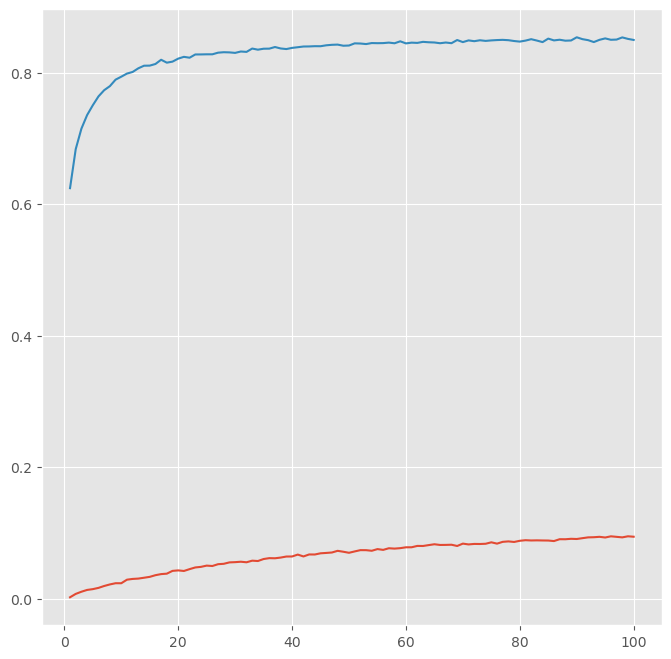

In [9]:
from mlp.penalties import L2Penalty
# experiment 3: L2 penalty 1e-3
# Setup hyperparameters
learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim = 784, 47
hidden_dim = 128

#reset the data and weight
rng.seed(seed)
train_data.reset()
valid_data.reset()
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)


# model configuration for this experiment
lambda_penalty = float(1e-3)
weights_penalty = L2Penalty(lambda_penalty)
biases_penalty = L2Penalty(lambda_penalty)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty, biases_penalty), # first hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty, biases_penalty), # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty, biases_penalty), # third hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty, biases_penalty) # output layer
])

# initialise the plot object
fig_ex3 = plt.figure(figsize=(8, 8))

# training 
error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRule(learning_rate=learning_rate)
stats_ex3, keys_ex3, _, fig_ex3 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, fig_ex3, notebook=True)